In [147]:
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [148]:
path = './data/'
files = os.listdir(path)

#files.sort()

files_1 = [i for i in files if '4_1' in i and '2500' in i]
files_2 = [i for i in files if '4_2' in i]
files_3 = [i for i in files if '4_3' in i]
files_4 = [i for i in files if '4_4' in i]
files_5 = [i for i in files if '4_5' in i]

       time    temp  temp_err        dac
1483  377.8  72.857    48.357  61.050061
1484  378.0  72.857    48.357  61.050061
1485  378.4  72.857    48.357  61.050061
1486  378.6  72.857    48.357  61.050061
1487  378.8  72.857    48.357  61.050061
1488  379.2  72.857    48.357  61.050061


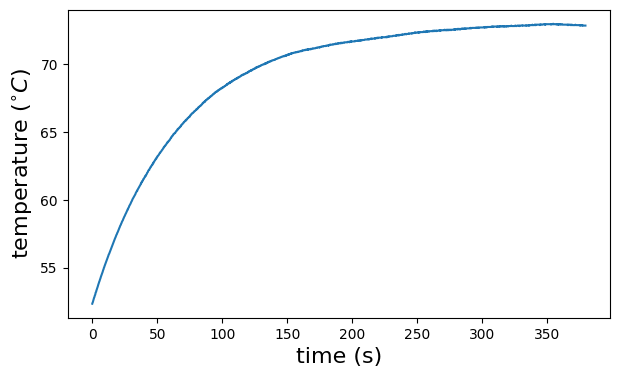

       time   temp  temp_err        dac
1597  406.0 -6.223   -30.723 -61.050061
1598  406.2 -6.223   -30.723 -61.050061
1599  406.6 -6.223   -30.723 -61.050061
1600  406.8 -6.223   -30.723 -61.050061
1601  407.0 -6.256   -30.756 -61.050061
1602  407.2 -6.256   -30.756 -61.050061


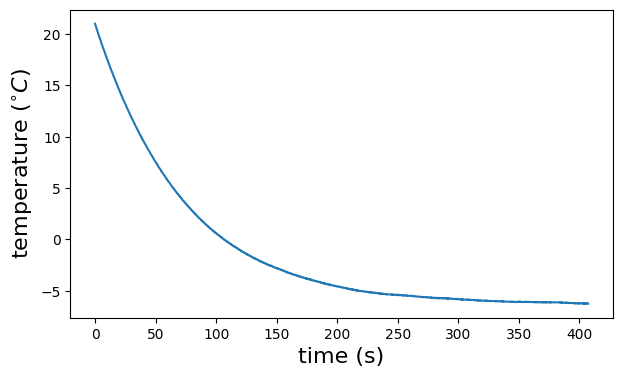

In [211]:
for f in files_1[:]:
    df = pd.read_csv(path+f, header=11, names=['time', 'temp', 'temp_err', 'dac'])
    df['time'] = df['time'] - df['time'][0]

    print(df[-6:])
    
    plt.figure(figsize=(7,4))
    plt.plot(df['time'], df['temp'])
    plt.xlabel(r"time (s)", fontsize=16)
    plt.ylabel(r"temperature ($^{\circ}C$)", fontsize=16)
    plt.savefig(f[:-4]+'.pdf', bbox_inches='tight')
    plt.show()


In [171]:
colors = ['blue', 'red', 'green', 'darkorange']

In [172]:
def cooling_plotter(files, legends, save_name, set_temperature=-5, max_temperature=5, max_time=150):
    plt.figure(figsize=(7,4))
    plt.axhline(y=set_temperature,xmin=0, xmax=1, linestyle='-.',color="black", alpha=0.7, label="Temperature set at "+str(set_temperature)+"$^{\circ}C$")
    
    for i in range(len(files)):
        df = pd.read_csv(path+files[i], header=11, names=['time', 'temp', 'temp_err', 'dac'])
        df = df[df['temp'] <= max_temperature]
        df.index = range(len(df))
        df['time'] = df['time'] - df['time'][0]
        df = df[df['time'] < max_time]
        df.index = range(len(df))

        plt.plot(df['time'], df['temp'], label=legends[i], color=colors[i])
        plt.fill_between(df['time'], df['temp'], set_temperature, color=colors[i], alpha=0.1)

    plt.xlabel(r"time (s)", fontsize=16)
    plt.ylabel(r"temperature ($^{\circ}C$)", fontsize=16)
    plt.legend(loc='upper right', fontsize=12)
    plt.savefig(save_name+'.pdf', bbox_inches='tight')
    plt.show()

def heating_plotter(files, legends, save_name, set_temperature=40, min_temperature=35, max_time=150):
    plt.figure(figsize=(7,4))
    plt.axhline(y=set_temperature,xmin=0, xmax=1, linestyle='-.',color="black", alpha=0.7, label="Temperature set at "+str(set_temperature)+"$^{\circ}C$")

    for i in range(len(files)):
        df = pd.read_csv(path+files[i], header=11, names=['time', 'temp', 'temp_err', 'dac'])
        df = df[df['temp'] >= min_temperature]
        df.index = range(len(df))
        df['time'] = df['time'] - df['time'][0]
        df = df[df['time'] < max_time]
        df.index = range(len(df))

        plt.plot(df['time'], df['temp'], label=legends[i], color=colors[i])
        plt.fill_between(df['time'], df['temp'], set_temperature, color=colors[i], alpha=0.1)

    plt.xlabel(r"time (s)", fontsize=16)
    plt.ylabel(r"temperature ($^{\circ}C$)", fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.savefig(save_name+'.pdf', bbox_inches='tight')
    plt.show()

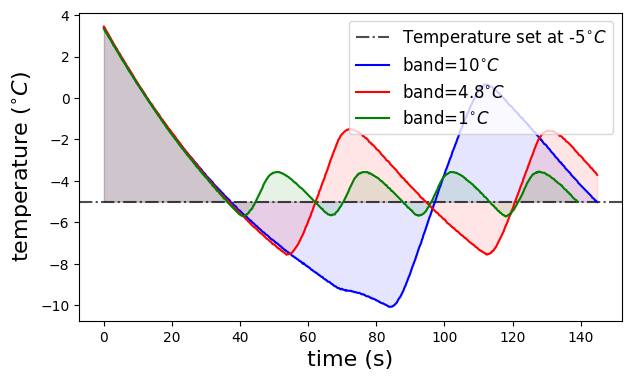

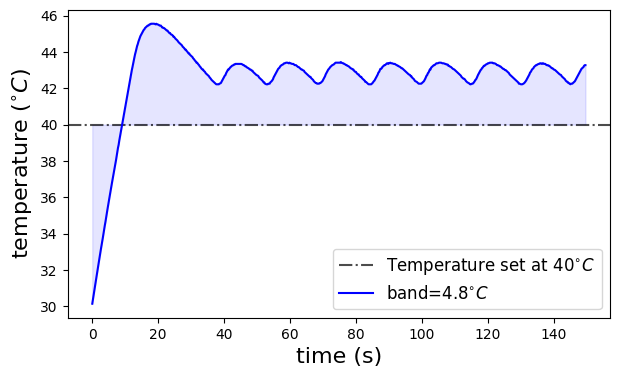

In [173]:
files_2_5deg = [i for i in files_2 if '5deg' in i]
files_2_40deg = [i for i in files_2 if '40deg' in i]

legends = ['band=10$^{\circ}C$', 'band=4.8$^{\circ}C$', 'band=1$^{\circ}C$']

cooling_plotter(files=files_2_5deg, legends=legends, save_name='4_2_normal_-5deg', set_temperature=-5, max_temperature=3.5, max_time=145)

legends = ['band=4.8$^{\circ}C$']

heating_plotter(files=files_2_40deg, legends=legends, save_name='4_2_normal_40deg', set_temperature=40, min_temperature=30, max_time=150)


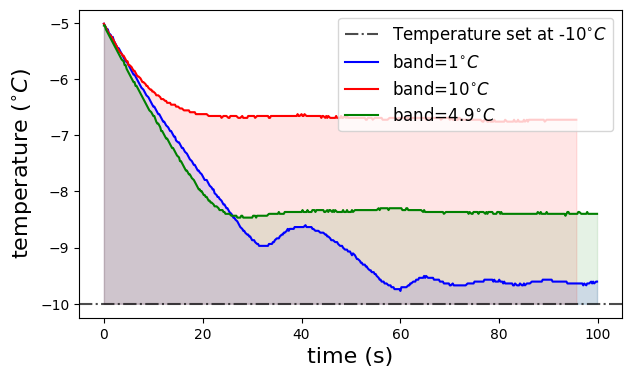

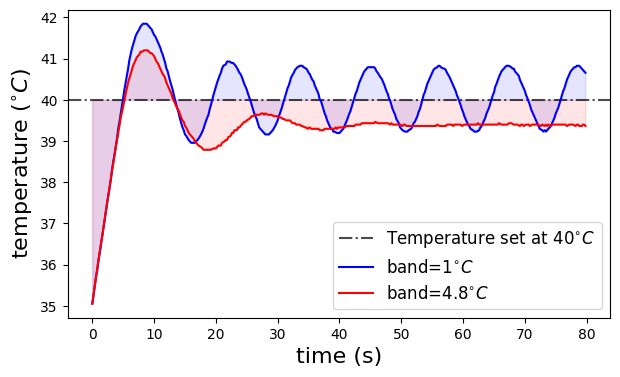

In [214]:
files_3_10deg = [i for i in files_3 if '10deg' in i]
files_3_40deg = [i for i in files_3 if '40deg' in i]

legends = ['band=1$^{\circ}C$', 'band=10$^{\circ}C$', 'band=4.9$^{\circ}C$']

cooling_plotter(files=files_3_10deg, legends=legends, save_name='4_3_propo_-10', set_temperature=-10, max_temperature=-5, max_time=100)

legends = ['band=1$^{\circ}C$', 'band=4.8$^{\circ}C$']

heating_plotter(files=files_3_40deg, legends=legends, save_name='4_3_propo_40', set_temperature=40, min_temperature=35, max_time=80)



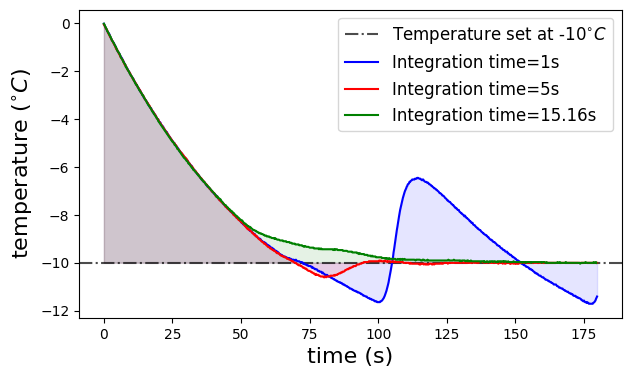

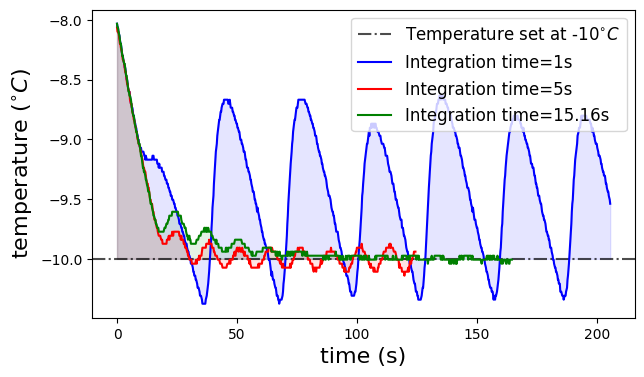

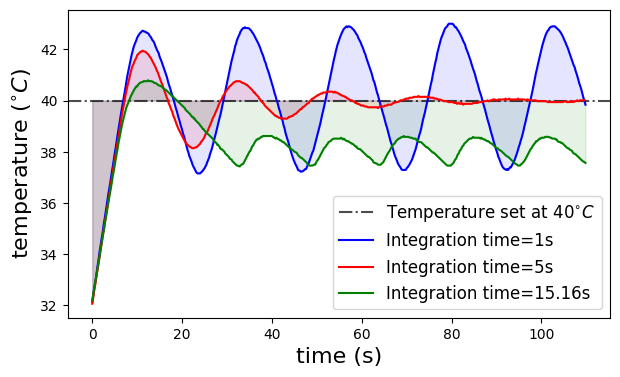

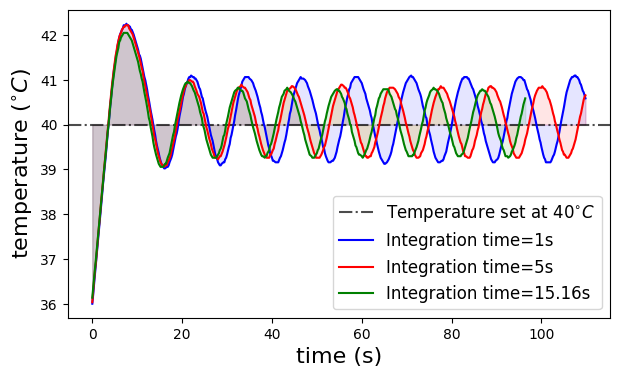

In [217]:
files_4_10deg = [i for i in files_4 if '10deg' in i]
files_4_10deg_4band = [i for i in files_4_10deg if 'band4' in i]
files_4_10deg_1band = [i for i in files_4_10deg if 'band1' in i]
files_4_40deg = [i for i in files_4 if '40deg' in i]
files_4_40deg_4band = [i for i in files_4_40deg if 'band4' in i]
files_4_40deg_1band = [i for i in files_4_40deg if 'band1' in i]

legends = ['Integration time=1s', 'Integration time=5s', 'Integration time=15.16s']

cooling_plotter(files=files_4_10deg_4band, legends=legends, save_name='4_4_propoI_band4_8_-10', set_temperature=-10, max_temperature=-0, max_time=180)

cooling_plotter(files=files_4_10deg_1band, legends=legends, save_name='4_4_propoI_band1_-10', set_temperature=-10, max_temperature=-8, max_time=500)

heating_plotter(files=files_4_40deg_4band, legends=legends, save_name='4_4_propoI_band4_8_40', set_temperature=40, min_temperature=32, max_time=110)

heating_plotter(files=files_4_40deg_1band, legends=legends, save_name='4_4_propoI_band1_40', set_temperature=40, min_temperature=36, max_time=110)

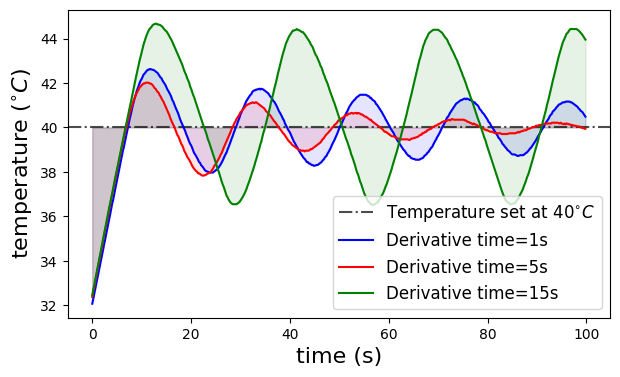

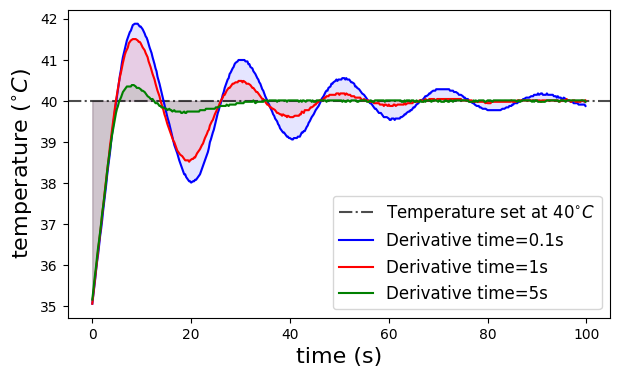

In [178]:
files_5_neg = [i for i in files_5 if 'neg' in i]
files_5_pos = [i for i in files_5 if 'pos' in i]

legends = ['Derivative time=1s', 'Derivative time=5s', 'Derivative time=15s']

heating_plotter(files=files_5_neg, legends=legends, save_name='4_5_propoID_negative', set_temperature=40, min_temperature=32, max_time=100)

legends = ['Derivative time=0.1s', 'Derivative time=1s', 'Derivative time=5s']

heating_plotter(files=files_5_pos, legends=legends, save_name='4_5_propoID_postive', set_temperature=40, min_temperature=35, max_time=100)